In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [101]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
0,ch150,150,AGM,1.071730,9315.0,0,0,0,0
1,ch150,150,VMC,0.955802,8191.0,0,0,0,0
2,ch150,150,I,1322.330000,13855.0,0,0,0,0
3,berlin52,52,AGM,0.172351,10402.0,0,0,0,0
4,berlin52,52,VMC,0.107099,8980.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1153,berlin52,52,I-TS2,161.472000,9590.0,50,150,150,50
1154,berlin52,52,I-TS2,158.002000,9590.0,100,150,150,50
1155,berlin52,52,I-TS2,259.835000,8641.0,10,150,150,100
1156,berlin52,52,I-TS2,265.639000,8641.0,50,150,150,100


In [4]:
df_resultados["metodo"] .unique()

array(['AGM', 'VMC'], dtype=object)

## Complejidad AGM

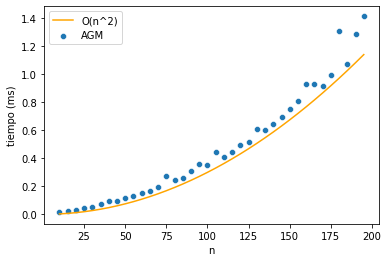

In [26]:
df_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_AGM["tiempo_esperado"] = (df_AGM["n"]**2) * 0.00003; # exponencial

fig = sns.scatterplot(data=df_AGM, x='n', y='tiempo');
fig = sns.lineplot(data=df_AGM , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','AGM']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9923997700942305


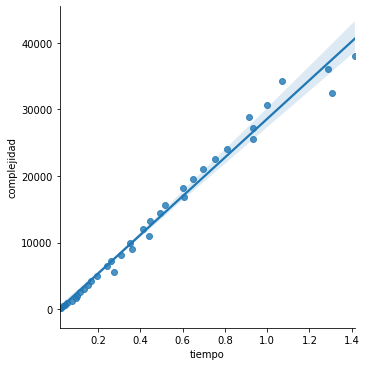

In [27]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_AGM["complejidad"] = df_AGM["n"] ** 2;
fig = sns.lmplot(data=df_AGM, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_AGM, "tiempo", "complejidad"));

## Complejidad VMC

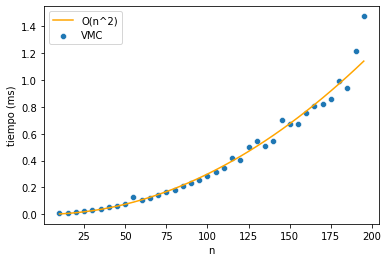

In [28]:
df_VMC = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_VMC["tiempo_esperado"] = (df_VMC["n"]**2) * 0.00003; # exponencial

fig = sns.scatterplot(data=df_VMC, x='n', y='tiempo');
fig = sns.lineplot(data=df_VMC , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','VMC']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.9856000823504055


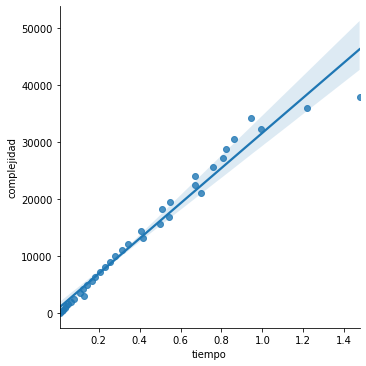

In [29]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_VMC = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_VMC["complejidad"] = df_VMC["n"] ** 2;
fig = sns.lmplot(data=df_VMC, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_VMC, "tiempo", "complejidad"));

## Complejidad Insercion

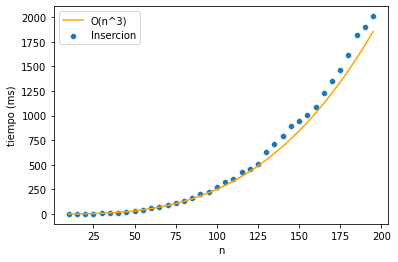

In [5]:
df_I = df_resultados[(df_resultados["metodo"]=="I") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_I["tiempo_esperado"] = (df_I["n"]**3) * 0.00025; # exponencial

fig = sns.scatterplot(data=df_I, x='n', y='tiempo');
fig = sns.lineplot(data=df_I , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^3)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9993701838193951


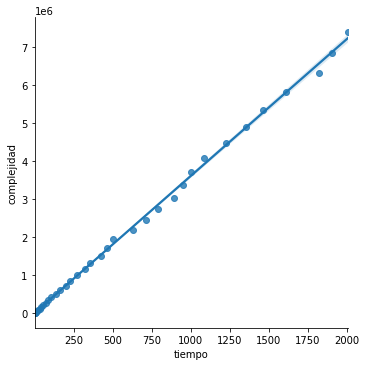

In [6]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_I = df_resultados[(df_resultados["metodo"]=="I") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_I["complejidad"] = df_I["n"] ** 3;
fig = sns.lmplot(data=df_I, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_I, "tiempo", "complejidad"));

# Buscar parametros optimos tabu

In [4]:
df_vmc = df_resultados[(df_resultados["metodo"]== "VMC" ) & (df_resultados["dataset"] == "berlin")].copy();
df_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
1153,berlin,52,VMC,0.125856,8980.0,0,0,0,0


In [5]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS1" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
575,berlin,52,VMC-TS1,170.31500,8110.0,100,150,150,100
574,berlin,52,VMC-TS1,172.20000,8110.0,50,150,150,100
538,berlin,52,VMC-TS1,168.19600,8110.0,50,150,10,100
539,berlin,52,VMC-TS1,165.80700,8110.0,100,150,10,100
549,berlin,52,VMC-TS1,165.57800,8110.0,10,150,50,100
...,...,...,...,...,...,...,...,...,...
492,berlin,52,VMC-TS1,18.19080,8980.0,10,100,50,10
482,berlin,52,VMC-TS1,18.51250,8980.0,100,100,10,10
481,berlin,52,VMC-TS1,18.25190,8980.0,50,100,10,10
530,berlin,52,VMC-TS1,27.15860,8980.0,100,150,10,10


In [7]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS2" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
767,berlin,52,VMC-TS2,168.87400,8197.0,100,150,150,100
766,berlin,52,VMC-TS2,174.40400,8197.0,50,150,150,100
730,berlin,52,VMC-TS2,174.21400,8197.0,50,150,10,100
731,berlin,52,VMC-TS2,179.97400,8197.0,100,150,10,100
741,berlin,52,VMC-TS2,180.10000,8197.0,10,150,50,100
...,...,...,...,...,...,...,...,...,...
684,berlin,52,VMC-TS2,18.99360,8980.0,10,100,50,10
674,berlin,52,VMC-TS2,19.01190,8980.0,100,100,10,10
673,berlin,52,VMC-TS2,19.19080,8980.0,50,100,10,10
722,berlin,52,VMC-TS2,27.67860,8980.0,100,150,10,10


# AGM

In [8]:
df_agm= df_resultados[(df_resultados["metodo"]== "AGM" ) & (df_resultados["dataset"] == "berlin")].copy();
df_agm.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
1152,berlin,52,AGM,0.172828,10402.0,0,0,0,0


In [9]:
df_tabu_agm = df_resultados[(df_resultados["metodo"]== "AGM-TS1" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu_agm.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
191,berlin,52,AGM-TS1,158.2700,8168.0,100,150,150,100
190,berlin,52,AGM-TS1,157.1700,8168.0,50,150,150,100
153,berlin,52,AGM-TS1,152.8490,8168.0,10,150,10,100
154,berlin,52,AGM-TS1,157.5980,8168.0,50,150,10,100
165,berlin,52,AGM-TS1,153.0360,8168.0,10,150,50,100
...,...,...,...,...,...,...,...,...,...
108,berlin,52,AGM-TS1,17.6279,10402.0,10,100,50,10
98,berlin,52,AGM-TS1,18.1322,10402.0,100,100,10,10
97,berlin,52,AGM-TS1,18.9138,10402.0,50,100,10,10
146,berlin,52,AGM-TS1,26.8928,10402.0,100,150,10,10


In [10]:
df_tabu_agm = df_resultados[(df_resultados["metodo"]== "AGM-TS2" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu_agm.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
383,berlin,52,AGM-TS2,177.15700,8166.0,100,150,150,100
382,berlin,52,AGM-TS2,169.77900,8166.0,50,150,150,100
345,berlin,52,AGM-TS2,173.91000,8166.0,10,150,10,100
346,berlin,52,AGM-TS2,175.00300,8166.0,50,150,10,100
357,berlin,52,AGM-TS2,170.11200,8166.0,10,150,50,100
...,...,...,...,...,...,...,...,...,...
300,berlin,52,AGM-TS2,18.97780,10402.0,10,100,50,10
290,berlin,52,AGM-TS2,20.41000,10402.0,100,100,10,10
289,berlin,52,AGM-TS2,20.23400,10402.0,50,100,10,10
338,berlin,52,AGM-TS2,28.53000,10402.0,100,150,10,10


## Inserción

In [12]:
df_i= df_resultados[(df_resultados["metodo"]== "I" ) & (df_resultados["dataset"] == "berlin")].copy();
df_i.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
1154,berlin,52,I,38.1369,15771.0,0,0,0,0


In [13]:
df_tabu_i = df_resultados[(df_resultados["metodo"]== "I-TS1" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu_i.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
959,berlin,52,I-TS1,210.3600,8641.0,100,150,150,100
958,berlin,52,I-TS1,202.9390,8641.0,50,150,150,100
922,berlin,52,I-TS1,212.9910,8641.0,50,150,10,100
923,berlin,52,I-TS1,217.4250,8641.0,100,150,10,100
933,berlin,52,I-TS1,211.3210,8641.0,10,150,50,100
...,...,...,...,...,...,...,...,...,...
785,berlin,52,I-TS1,46.2619,15771.0,100,20,50,30
784,berlin,52,I-TS1,49.1181,15771.0,50,20,50,30
783,berlin,52,I-TS1,45.9264,15771.0,10,20,50,30
781,berlin,52,I-TS1,42.1146,15771.0,50,20,50,10


In [14]:
df_tabu2_i = df_resultados[(df_resultados["metodo"]== "I-TS2" ) & (df_resultados["dataset"] == "berlin")].copy();
df_tabu2_i.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,max_iter,rang_iter,percentage,largolista
1151,berlin,52,I-TS2,218.1790,8641.0,100,150,150,100
1113,berlin,52,I-TS2,217.9460,8641.0,10,150,10,100
1125,berlin,52,I-TS2,212.5130,8641.0,10,150,50,100
1126,berlin,52,I-TS2,215.2430,8641.0,50,150,50,100
1127,berlin,52,I-TS2,212.9110,8641.0,100,150,50,100
...,...,...,...,...,...,...,...,...,...
977,berlin,52,I-TS2,47.0880,15771.0,100,20,50,30
976,berlin,52,I-TS2,45.8720,15771.0,50,20,50,30
975,berlin,52,I-TS2,46.6753,15771.0,10,20,50,30
973,berlin,52,I-TS2,45.4012,15771.0,50,20,50,10


## GAP

In [119]:
## gap = costo / optimo * 100 - 100 = gap
def gap(costo, optimo):
    return int(costo / optimo * 100 - 100)

dic_optimos = {'ch150': 6528, 'berlin52': 7542}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "ch150")].copy();
df_gap.drop(df_gap.columns[[5,6,7,8]], axis=1, inplace=True)
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo / optimo * 100 - 100)
    
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(str(int(value_gap)) + ' %')


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap
df_gap

,dataset,n,metodo,tiempo,costo,optimo,gap
0,ch150,150,AGM,1.071730,9315.0,6528,42 %
1,ch150,150,VMC,0.955802,8191.0,6528,25 %
2,ch150,150,I,1322.330000,13855.0,6528,112 %
3,berlin52,52,AGM,0.172351,10402.0,7542,37 %
4,berlin52,52,VMC,0.107099,8980.0,7542,19 %
...,...,...,...,...,...,...,...
1153,berlin52,52,I-TS2,161.472000,9590.0,7542,27 %
1154,berlin52,52,I-TS2,158.002000,9590.0,7542,27 %
1155,berlin52,52,I-TS2,259.835000,8641.0,7542,14 %
1156,berlin52,52,I-TS2,265.639000,8641.0,7542,14 %


# Burma 14

In [ ]:
dic_optimos = {'ch150': 6528, 'berlin52': 7542, 'burma14': 3323}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "burma14")].copy();
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo - optimo) / optimo 
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(value_gap)


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap
df_gap

In [ ]:
df_burma =  df_resultados[(df_resultados["dataset"] == "burma14")].copy();
df_berlin = df_resultados[(df_resultados["dataset"] == "berlin52")].copy();

sns.set_style("darkgrid")
plt.figure(figsize=(6,6))


sns.barplot(data = df_burma, x = 'metodo', y = 'costo',palette="Blues_d")
plt.title("Costo Burma14")
plt.show()
sns.barplot(data = df_berlin, x = 'metodo', y = 'costo',palette="Reds_d")
plt.title("Costo Berlin52")
plt.show()